In [2]:
#import pandas, numpy, matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sb


In [3]:
#unzip the file and save to a directory
import zipfile
with zipfile.ZipFile("archive (9).zip","r") as zip_ref:
    zip_ref.extractall("targetdir")


FileNotFoundError: [Errno 2] No such file or directory: 'archive (9).zip'

In [4]:
#extract the zipfile
import zipfile as zf

files = zf.ZipFile("archive (9).zip",'r')
files.extractall()


FileNotFoundError: [Errno 2] No such file or directory: 'archive (9).zip'

In [5]:
#read the files into a dataframe
df=pd.read_csv('TV_Final.csv')
#read the dataframe
df.head(5)

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4
2,realme,HD LED,32,13999,17999,Android,4.3
3,Mi,HD LED,32,14999,19999,Android,4.4
4,realme,HD LED,32,12999,21999,Android,4.3


In [6]:
#the shape of the file
df.shape

(912, 7)

In [7]:
#duplicates in the dataframe
df.duplicated().sum()

30

In [8]:
#null entries
df.isnull().sum()

Brand                 0
Resolution            0
Size                  0
Selling Price         0
Original Price        0
Operating System     11
Rating              220
dtype: int64

### There are 30 duplicate entries and two columns with null entries ( rating and operating system column)

In [9]:
df.describe()

,Size,Selling Price,Original Price,Rating
count,912.000000,912.000000,912.000000,692.000000
mean,45.942982,59358.606360,81975.213816,4.234104
std,12.316492,65866.677856,84823.568826,0.366694
min,17.000000,4849.000000,6999.000000,2.000000
25%,32.000000,19797.500000,28990.000000,4.100000
50%,43.000000,36990.000000,52900.000000,4.300000
75%,55.000000,67064.250000,99900.000000,4.400000
max,85.000000,499990.000000,549990.000000,5.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             912 non-null    object 
 1   Resolution        912 non-null    object 
 2   Size              912 non-null    int64  
 3   Selling Price     912 non-null    int64  
 4   Original Price    912 non-null    int64  
 5   Operating System  901 non-null    object 
 6   Rating            692 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 50.0+ KB


### Clean the data by removing the duplicates and handling the null entries

In [11]:
#make a copy of the dataframe, to make changes to the new copy and retain the original as df
df_clean=df.copy()

In [12]:
df_clean.head(5)

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4
2,realme,HD LED,32,13999,17999,Android,4.3
3,Mi,HD LED,32,14999,19999,Android,4.4
4,realme,HD LED,32,12999,21999,Android,4.3


In [13]:
#drop the duplicates 
df_clean.drop_duplicates(inplace=True)

In [14]:
# fill the null entries in the operating system column with 'Unknown'
df_clean['Operating System'].fillna("Unknown",inplace =True)

In [15]:
#fill the null rating with the mean
df_clean['Rating'].fillna(df_clean['Rating'].mean(),inplace=True)

In [16]:
#check for the changes
df_clean.isnull().any()

Brand               False
Resolution          False
Size                False
Selling Price       False
Original Price      False
Operating System    False
Rating              False
dtype: bool

In [17]:
#check for changes 
df_clean.duplicated().any()

False

### QUESTIONS
    1. WHICH TV BRAND IS MOST EXPENSIVE
    2. WHICH RESOLUTION IS MOST EXPENSIVE
    3. WHICH OPERATIONG SYSTEM IS USED BY MOST BRANDS
    4. WHICH TV BRAND HAS THE HIGHEST RATING
    5  WHAT IS THE AVERAGE SELLING AND ORIGINAL PRICE OF EACH BRAND OF TV

## Brand distribution 

In [18]:
#change the Brand column to upper since some entries have a brand in lowercases and others in uppercases for the same brand
df_clean['Brand']=df_clean['Brand'].str.upper()
df_clean['Brand'].unique()

array(['TOSHIBA', 'TCL ', 'REALME ', 'MI ', 'ONEPLUS', 'HISENSE', 'LG ',
       'MARQ BY FLIPKART', 'IFFALCON BY TCL', 'COOCAA ', 'SAMSUNG',
       'INFINIX', 'VU', 'NOKIA ', 'THOMSON', 'SONY ', 'KODAK ',
       'MOTOROLA', 'PHILIPS', 'ACER', 'BLAUPUNKT', 'ADSUN', 'T-SERIES',
       'PANASONIC', 'MICROMAX', 'SANSUI ', 'CROMA ', 'CANDES ', 'DYANORA',
       'HAIER ', 'ONIDA', 'RGL ', 'LLOYD ', 'LUMX ', 'ONIX ', 'IMPEX ',
       'BPL ', 'CLOUDWALKER', 'OXYGEN ', 'POWER GUARD', 'AKAI ', 'VG ',
       'SUN KING', 'COMPAQ ', 'HUIDI ', 'INTEX ', 'DETEL ', 'JVC',
       'G-TEN ', 'SKYWORTH', 'MASER ', 'SANYO ', 'MURPHY ', 'DEKTRON',
       'SHARP ', 'KRISONS', 'WESTON ', 'AISEN  '], dtype=object)

In [19]:
df_clean['Brand'].describe()

count         882
unique         58
top       SAMSUNG
freq          146
Name: Brand, dtype: object

Text(0.5, 1.0, 'Top 10 Common Brands')

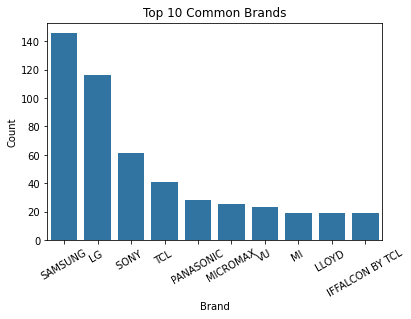

In [20]:
#set a default color for viz
color=sb.color_palette()[0]
sb.countplot(data=df_clean,x='Brand',color=color,order=df_clean['Brand'].value_counts().index[0:10])
plt.xticks(rotation=30)
plt.xlabel("Brand")
plt.ylabel("Count")
plt.title('Top 10 Common Brands')

In [21]:
#show the  brand with the highest selling price and original price
df_clean.loc[df_clean['Selling Price']==df_clean['Selling Price'].max()]

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
507,HISENSE,QLED Ultra HD,75,499990,499990,Android,4.237685


#### The Brand with the highest selling price is Hisense, with the price of 499990

In [22]:
df_clean.loc[df_clean['Selling Price']==df_clean['Selling Price'].min()]

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
858,RGL,Full HD LED,20,4849,8990,HomeOS,3.9


#### RGL has the lowest selling price

In [23]:
#original price
df_clean.loc[df_clean['Original Price']==df_clean['Original Price'].max()]

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
268,LG,Ultra HD LED,75,385099,549990,WebOS,4.237685


#### The Brand with the highest original price is LG with the price of 549990

In [24]:
df_clean.loc[df_clean['Original Price']==df_clean['Original Price'].min()]

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
794,KRISONS,HD LED,17,5499,6999,Android,4.237685


#### Krisons has the lowest original price

In [25]:
# Create a new discount column 
df_clean['Discount']= df_clean['Original Price']- df_clean['Selling Price']

In [26]:
df_clean.head(5)

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating,Discount
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3,16991
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4,76991
2,REALME,HD LED,32,13999,17999,Android,4.3,4000
3,MI,HD LED,32,14999,19999,Android,4.4,5000
4,REALME,HD LED,32,12999,21999,Android,4.3,9000


In [27]:
### The Brand that awarded the highest discount
df_clean.loc[df_clean['Discount']==df_clean['Discount'].max()]

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating,Discount
581,TCL,QLED Ultra HD,75,149990,399990,Android,3.9,250000


#### TCL brand awarded the largest discount of 250000

In [28]:
### Least discounted brand
df_clean.loc[df_clean['Discount']==df_clean['Discount'].min()]

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating,Discount
113,SONY,Full HD LED,43,44900,44900,Linux,4.600000,0
170,SAMSUNG,HD LED,32,29900,29900,Tizen,3.800000,0
174,LG,Ultra HD LED,43,54990,54990,WebOS,4.400000,0
193,LG,Full HD LED,55,103990,103990,WebOS,4.200000,0
198,MI,HD LED,32,14999,14999,Android,4.400000,0
...,...,...,...,...,...,...,...,...
887,SHARP,Full HD LED,40,103990,103990,Linux,4.237685,0
896,SANSUI,Ultra HD LED,49,59990,59990,Linux,4.237685,0
902,SONY,Full HD LED,43,53423,53423,Linux,4.400000,0
910,SONY,HD LED,32,32900,32900,Linux,4.400000,0


In [29]:
df_min_discount=df_clean.loc[df_clean['Discount']==df_clean['Discount'].min()]
df_min_discount['Brand'].value_counts()

SAMSUNG            46
LG                 17
SONY                5
MICROMAX            5
WESTON              5
SHARP               5
SANSUI              4
TCL                 4
ONIX                3
IMPEX               3
ONIDA               3
MI                  2
LUMX                2
LLOYD               2
INTEX               2
IFFALCON BY TCL     2
VU                  2
PANASONIC           2
ACER                1
THOMSON             1
JVC                 1
CLOUDWALKER         1
PHILIPS             1
HISENSE             1
Name: Brand, dtype: int64

#### Samsumg Brand has the least discount offers 

In [30]:
df_brand=df_clean.groupby(['Brand']).mean()
df_brand.sort_values(by=['Selling Price','Original Price'],ascending= False)

,Size,Selling Price,Original Price,Rating,Discount
Brand,,,,,
SHARP,46.750000,149672.000000,156656.250000,4.015764,6984.250000
SAMSUNG,50.349315,107034.739726,131637.294521,4.256394,24602.554795
LG,50.439655,96403.396552,136257.456897,4.283347,39854.060345
SONY,49.967213,90071.409836,131795.000000,4.487313,41723.590164
HISENSE,52.800000,89795.400000,100790.000000,4.331306,10994.600000
PANASONIC,47.035714,55252.750000,77786.785714,4.200519,22534.035714
IFFALCON BY TCL,54.526316,54234.421053,99990.473684,4.284898,45756.052632
TCL,49.585366,52296.268293,98338.634146,4.217710,46042.365854
AKAI,51.750000,48183.000000,77040.000000,4.237685,28857.000000


In [31]:
df_brand.sort_values(by=['Rating'],ascending= False)

,Size,Selling Price,Original Price,Rating,Discount
Brand,,,,,
SONY,49.967213,90071.409836,131795.000000,4.487313,41723.590164
ONEPLUS,50.000000,47375.777778,54199.222222,4.388889,6823.444444
VU,50.043478,46649.869565,66151.478261,4.356522,19501.608696
MOTOROLA,48.066667,38399.000000,54825.933333,4.333333,16426.933333
HAIER,45.000000,36616.222222,54976.722222,4.332690,18360.500000
HISENSE,52.800000,89795.400000,100790.000000,4.331306,10994.600000
COMPAQ,49.000000,45999.000000,83197.200000,4.320000,37198.200000
MI,44.157895,30787.052632,37577.947368,4.317773,6790.894737
ONIDA,38.916667,29707.166667,40358.333333,4.308333,10651.166667


## Brand Conclusion

#### Samsung and LG are the most common TV brands in the Dataset

#### The Brand with the highest selling price is Hisense, with the price of 499990 and RGL with the lowest selling price


#### The Brand with the highest original price is LG with the price of 549990 and Krisons with the lowest original price


#### TCL brand awarded the largest discount of 250000

#### Samsumg Brand has the least discount offers with 40 TV sold at the original prices.

### By average Sharp, Samsung ,LG, Sony ,hisense have the highest average Selling and Original Prices

### By average rating Sony, Oneplus,Vu ,Motorola , Haier and Hisense have the highest rating.

## Resolution

In [32]:
df_clean.head(5)

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating,Discount
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3,16991
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4,76991
2,REALME,HD LED,32,13999,17999,Android,4.3,4000
3,MI,HD LED,32,14999,19999,Android,4.4,5000
4,REALME,HD LED,32,12999,21999,Android,4.3,9000


In [33]:
#functions defined for countplot
def count_plot(data,x,color):
    sb.countplot(data=data,x=x,color=color)
#function defined for labels and title
def x_y_t(xlabel,ylabel,title):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

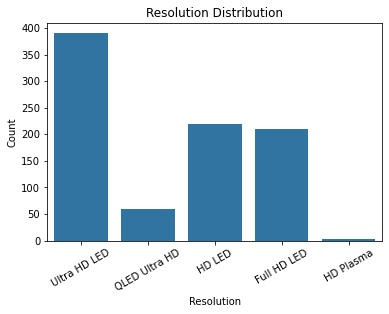

In [34]:
#resolution countplot
count_plot(df_clean,'Resolution',color)
plt.xticks(rotation=30)
x_y_t('Resolution','Count','Resolution Distribution')

#### Ultra HD LED is the most common resolution in the dataframe.
##### The least common resolution is the HD plasma

In [35]:
def bar_plot(data,x,y,color):
    sb.barplot(data=data,x=x,y=y,color=color)
    plt.xticks(rotation=30)

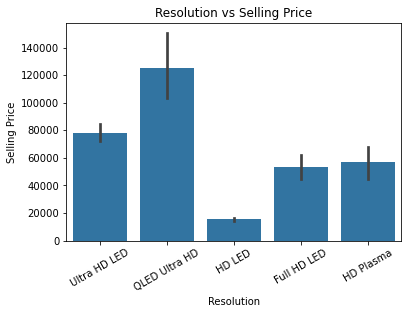

In [36]:
#barplot Resolution vs Selling price
bar_plot(df_clean,'Resolution','Selling Price',color)
x_y_t('Resolution','Selling Price','Resolution vs Selling Price')

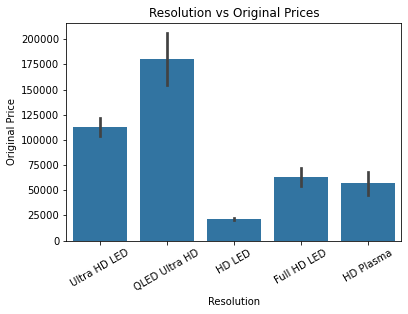

In [37]:
bar_plot(df_clean,'Resolution','Original Price',color=color)
x_y_t('Resolution','Original Price',"Resolution vs Original Prices")

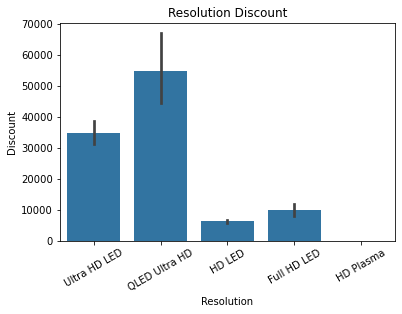

In [38]:
bar_plot(df_clean,'Resolution','Discount',color=color)
x_y_t('Resolution','Discount',"Resolution Discount")

In [39]:
#groupby Resolution and mean view the statistics based on the averages
df_resolution=df_clean.groupby(['Resolution']).mean()
df_resolution

,Size,Selling Price,Original Price,Rating,Discount
Resolution,,,,,
Full HD LED,43.509524,53053.885714,62866.719048,4.246819,9812.833333
HD LED,30.995434,15447.324201,21640.712329,4.131945,6193.388128
HD Plasma,47.333333,56996.666667,56996.666667,3.845895,0.000000
QLED Ultra HD,57.466667,125417.450000,180293.083333,4.367369,54875.633333
Ultra HD LED,54.146154,78099.771795,112825.425641,4.275207,34725.653846


In [40]:
#sort the df_resolution to view diff statistics
df_resolution.sort_values(by=['Selling Price'],ascending= False)


,Size,Selling Price,Original Price,Rating,Discount
Resolution,,,,,
QLED Ultra HD,57.466667,125417.450000,180293.083333,4.367369,54875.633333
Ultra HD LED,54.146154,78099.771795,112825.425641,4.275207,34725.653846
HD Plasma,47.333333,56996.666667,56996.666667,3.845895,0.000000
Full HD LED,43.509524,53053.885714,62866.719048,4.246819,9812.833333
HD LED,30.995434,15447.324201,21640.712329,4.131945,6193.388128


In [41]:
df_resolution.sort_values(by=['Original Price'],ascending= False)

,Size,Selling Price,Original Price,Rating,Discount
Resolution,,,,,
QLED Ultra HD,57.466667,125417.450000,180293.083333,4.367369,54875.633333
Ultra HD LED,54.146154,78099.771795,112825.425641,4.275207,34725.653846
Full HD LED,43.509524,53053.885714,62866.719048,4.246819,9812.833333
HD Plasma,47.333333,56996.666667,56996.666667,3.845895,0.000000
HD LED,30.995434,15447.324201,21640.712329,4.131945,6193.388128


### QLED ULTRA HD has the highest AVERAGE Selling Price and Original Price


In [42]:
df_resolution.sort_values(by=['Discount'],ascending= False)

,Size,Selling Price,Original Price,Rating,Discount
Resolution,,,,,
QLED Ultra HD,57.466667,125417.450000,180293.083333,4.367369,54875.633333
Ultra HD LED,54.146154,78099.771795,112825.425641,4.275207,34725.653846
Full HD LED,43.509524,53053.885714,62866.719048,4.246819,9812.833333
HD LED,30.995434,15447.324201,21640.712329,4.131945,6193.388128
HD Plasma,47.333333,56996.666667,56996.666667,3.845895,0.000000


### HD Plasma has least awarded discounts 
### QLED Utra HD has the highest average awarded discount

In [43]:
df_resolution.sort_values(by=['Rating'],ascending= False)

,Size,Selling Price,Original Price,Rating,Discount
Resolution,,,,,
QLED Ultra HD,57.466667,125417.450000,180293.083333,4.367369,54875.633333
Ultra HD LED,54.146154,78099.771795,112825.425641,4.275207,34725.653846
Full HD LED,43.509524,53053.885714,62866.719048,4.246819,9812.833333
HD LED,30.995434,15447.324201,21640.712329,4.131945,6193.388128
HD Plasma,47.333333,56996.666667,56996.666667,3.845895,0.000000


### QLED Ultra HD has the highest average rating

## RESOLUTION CONCLUSION
#####  QLED ULTRA HD has the highest AVERAGE Selling Price and Original Price
##### HD Plasma has least awarded discounts
##### QLED Utra HD has the highest average awarded discount
##### QLED Ultra HD has the highest average rating

## Operating Systems

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'VIDAA'),
  Text(1, 0, 'Android'),
  Text(2, 0, 'Linux'),
  Text(3, 0, 'Unknown'),
  Text(4, 0, 'Tizen'),
  Text(5, 0, 'WebOS'),
  Text(6, 0, 'HomeOS'),
  Text(7, 0, 'FireTV OS')])

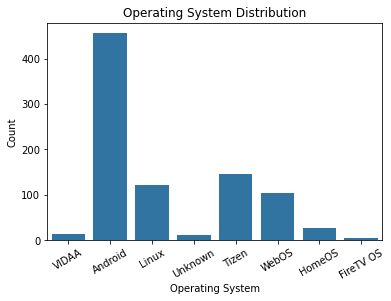

In [44]:
#countplot 
count_plot(df_clean,"Operating System",color)
x_y_t('Operating System','Count','Operating System Distribution')
plt.xticks(rotation=30)

#### Android is the most used Operating System in the dataset

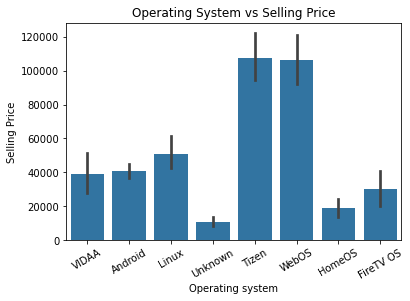

In [45]:
bar_plot(df_clean,'Operating System','Selling Price',color)
x_y_t('Operating system','Selling Price','Operating System vs Selling Price')

In [46]:
#a groupby operating system df
df_os=df_clean.groupby(['Operating System']).mean()

In [47]:
#sort by selling price
df_os.sort_values(by=['Selling Price'],ascending =False)

,Size,Selling Price,Original Price,Rating,Discount
Operating System,,,,,
Tizen,50.400000,107459.806897,132152.724138,4.256093,24692.917241
WebOS,53.038835,106315.611650,150398.553398,4.302604,44082.941748
Linux,43.426230,51120.688525,68937.155738,4.253422,17816.467213
Android,44.967105,40857.960526,61320.004386,4.225665,20462.043860
VIDAA,49.230769,38852.846154,55069.692308,4.306802,16216.846154
FireTV OS,41.000000,30490.000000,43000.000000,4.390148,12510.000000
HomeOS,33.740741,18714.259259,29037.370370,4.096351,10323.111111
Unknown,27.454545,10570.181818,17404.727273,3.906852,6834.545455


In [48]:
df_os.sort_values(by=['Original Price'],ascending =False)

,Size,Selling Price,Original Price,Rating,Discount
Operating System,,,,,
WebOS,53.038835,106315.611650,150398.553398,4.302604,44082.941748
Tizen,50.400000,107459.806897,132152.724138,4.256093,24692.917241
Linux,43.426230,51120.688525,68937.155738,4.253422,17816.467213
Android,44.967105,40857.960526,61320.004386,4.225665,20462.043860
VIDAA,49.230769,38852.846154,55069.692308,4.306802,16216.846154
FireTV OS,41.000000,30490.000000,43000.000000,4.390148,12510.000000
HomeOS,33.740741,18714.259259,29037.370370,4.096351,10323.111111
Unknown,27.454545,10570.181818,17404.727273,3.906852,6834.545455


In [49]:
df_os.sort_values(by=['Rating'],ascending =False)

,Size,Selling Price,Original Price,Rating,Discount
Operating System,,,,,
FireTV OS,41.000000,30490.000000,43000.000000,4.390148,12510.000000
VIDAA,49.230769,38852.846154,55069.692308,4.306802,16216.846154
WebOS,53.038835,106315.611650,150398.553398,4.302604,44082.941748
Tizen,50.400000,107459.806897,132152.724138,4.256093,24692.917241
Linux,43.426230,51120.688525,68937.155738,4.253422,17816.467213
Android,44.967105,40857.960526,61320.004386,4.225665,20462.043860
HomeOS,33.740741,18714.259259,29037.370370,4.096351,10323.111111
Unknown,27.454545,10570.181818,17404.727273,3.906852,6834.545455


### Tizen and WebOs have high average selling price and original price
#### The FireTv Os has the highest average rating

In [50]:
brand_os=df_clean.groupby(['Brand','Operating System']).mean()

In [51]:
brand_os.sort_values(by=['Rating'],ascending=False)

Size   Selling Price  Original Price    Rating  \
Brand    Operating System                                                       
SONY     Linux             46.545455   67401.909091    91670.454545  4.503426   
         Android           54.000000  116789.035714   179084.642857  4.468323   
CROMA    FireTV OS         41.000000   30490.000000    43000.000000  4.390148   
ONEPLUS  Android           50.000000   47375.777778    54199.222222  4.388889   
VU       Android           48.411765   45567.058824    65314.058824  4.358824   
...                              ...            ...             ...       ...   
ADSUN    Android           38.714286   15220.428571    27713.285714  3.800000   
MASER    Unknown           24.000000    7499.000000     7999.000000  3.800000   
MURPHY   Unknown           29.333333   11490.000000    14993.000000  3.645895   
SKYWORTH Unknown           24.000000    8659.000000    12490.000000  3.000000   
MURPHY   Android           32.000000   16799.000000    17999.000000  2.600000   

                               Discount  
Brand    Operating System                
SONY     Linux             24268.545455  
         Android           62295.607143  
CROMA    FireTV OS         12510.000000  
ONEPLUS  Android            6823.444444  
VU       Android           19747.000000  
...                                 ...  
ADSUN    Android           12492.857143  
MASER    Unknown             500.000000  
MURPHY   Unknown            3503.000000  
SKYWORTH Unknown            3831.000000  
MURPHY   Android            1200.000000  

[77 rows x 5 columns]

# Conclusions
    1. Samsung and LG are the most common Tv Brands in the dataset
    2. The Brand with the highest selling price is Hisense, with the price of 499990 and RGL with the lowest selling price.
    3. The Brand with the highest original price is LG with the price of 549990 and Krisons with the lowest original price
    4. Samsumg Brand has the least discount offers with 40 TV sold at the original prices.
    5. By average Sharp, Samsung ,LG, Sony ,hisense have the highest average Selling and Original Prices
    6. By average rating Sony, Oneplus,Vu ,Motorola , Haier and Hisense have the highest rating.
    7. QLED Ultra HD Resolution has the highest average rating, and selling and original Price
    8. Fire OS has the highest avergae rating
    9. On average Tizen and WebOS operating systems have the highest selling and original price

In [52]:
# save the clean dataset to csv
df_clean.to_csv('Tv_master.csv')